<h1><b><i>Ο αλγόριθμος Προσομοιωμένης Ανόπτησης</i> (<i>Simulated Annealing</i>)</b></h1>

Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο της <i>Προσομοιωμένης Ανόπτησης</i> (<i>Simulated Annealing</i>), περισσότερες πληροφορίες για τον οποίο μπορείτε να βρείτε <a href="https://en.wikipedia.org/wiki/Simulated_annealing">εδώ</a>.Θα χρησιμοποιήσετε τα <b>δύο έτοιμα</b> προγράμματα που δίνονται στη συνέχεια. Τα προγράμματα αυτά επιλύουν το πρόβλημα του <i>Περιπλανώμενου Πωλητή</i> (<i>Travelling Salesman Problem</i>, <i>TSP</i>), περισσότερες πληροφορίες για το οποίο μπορείτε να βρείτε <a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem">εδώ</a>. Το πρώτο πρόγραμμα επιλύει το πρόβλημα <i>TSP</i> χρησιμοποιώντας τον αλγόριθμο <i>Simulated Annealing</i> και το δεύτερο επιλύει το ίδιο πρόβλημα, χρησιμοποιώντας τον αλγόριθμο <a href="https://en.wikipedia.org/wiki/Hill_climbing"><i>Hill Climbing</i></a>. Η επίλυση του προβλήματος γίνεται για <b>150 πόλεις</b>.

<b>Σημείωση:</b> Βεβαιωθείτε ότι το <b><i>Runtime Environment</i></b> είναι για <b><i>Python 2</i></b>.

<h2><b><i>Simulated Annealing</i></b></h2>

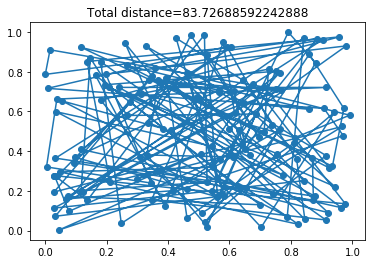

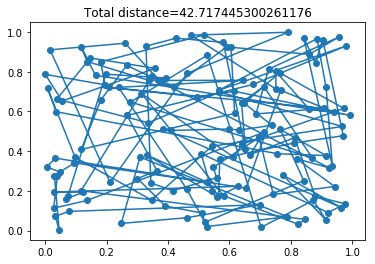

T=   0.20000 , distance=   42.71745 , accepted steps= 1501


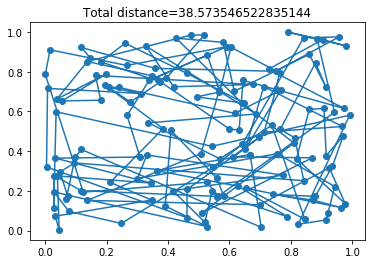

T=   0.18000 , distance=   38.57355 , accepted steps= 1501


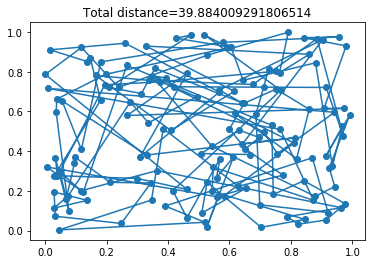

T=   0.16200 , distance=   39.88401 , accepted steps= 1501


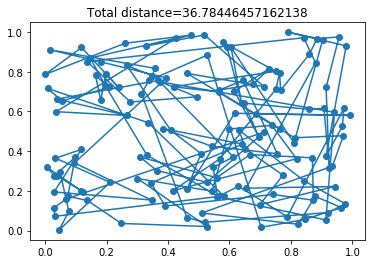

T=   0.14580 , distance=   36.78446 , accepted steps= 1501


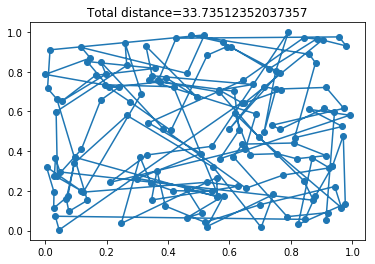

T=   0.13122 , distance=   33.73512 , accepted steps= 1501


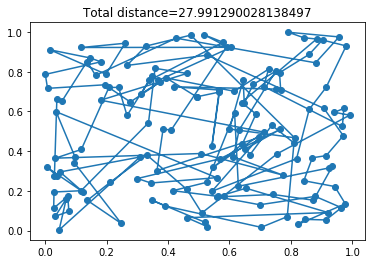

T=   0.11810 , distance=   27.99129 , accepted steps= 1485


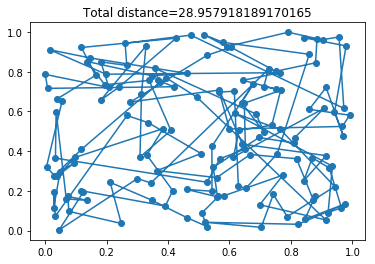

T=   0.10629 , distance=   28.95792 , accepted steps= 1231


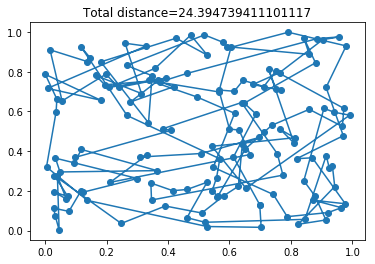

T=   0.09566 , distance=   24.39474 , accepted steps= 989


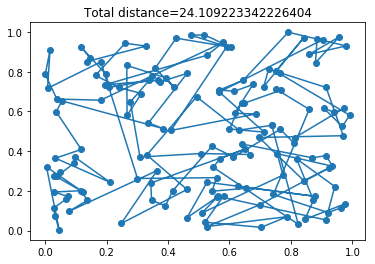

T=   0.08609 , distance=   24.10922 , accepted steps= 806


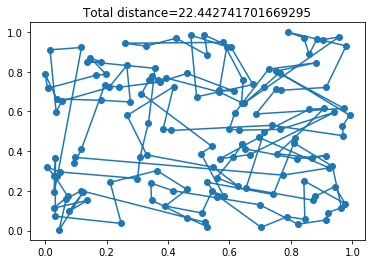

T=   0.07748 , distance=   22.44274 , accepted steps= 720


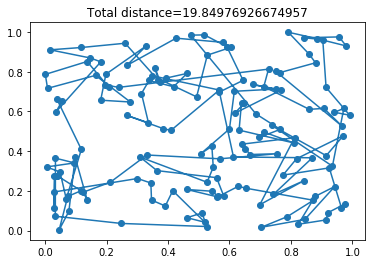

T=   0.06974 , distance=   19.84977 , accepted steps= 593


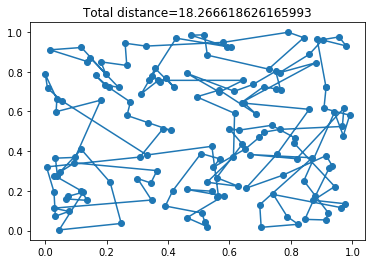

T=   0.06276 , distance=   18.26662 , accepted steps= 488


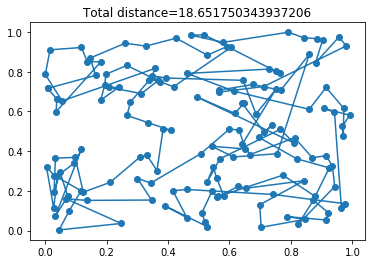

T=   0.05649 , distance=   18.65175 , accepted steps= 383


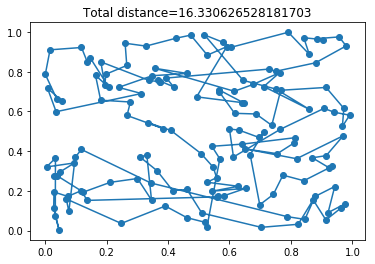

T=   0.05084 , distance=   16.33063 , accepted steps= 305


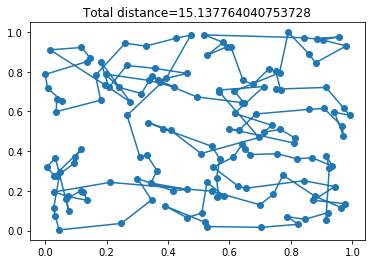

T=   0.04575 , distance=   15.13776 , accepted steps= 253


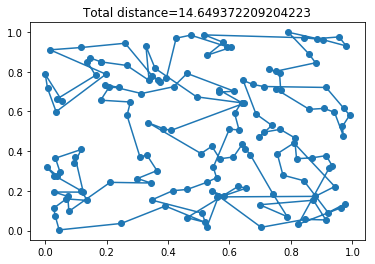

T=   0.04118 , distance=   14.64937 , accepted steps= 225


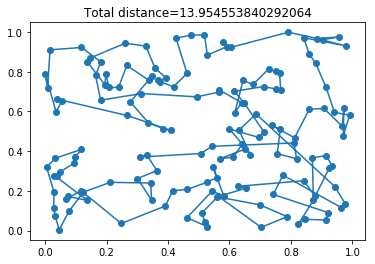

T=   0.03706 , distance=   13.95455 , accepted steps= 199


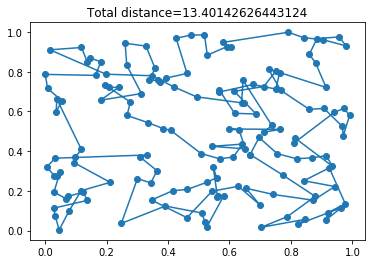

T=   0.03335 , distance=   13.40143 , accepted steps= 179


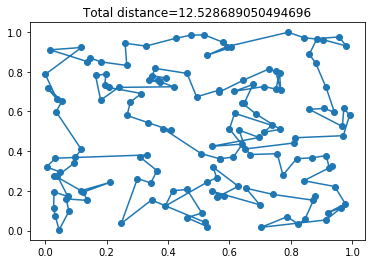

T=   0.03002 , distance=   12.52869 , accepted steps= 128


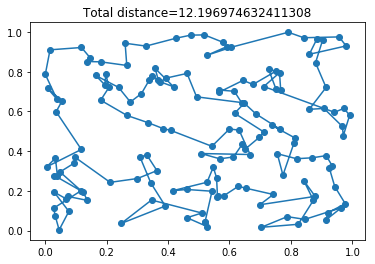

T=   0.02702 , distance=   12.19697 , accepted steps= 119


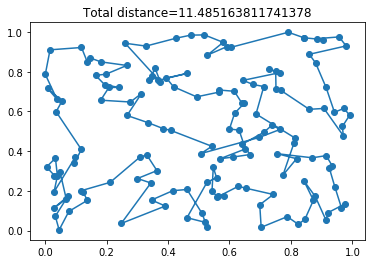

T=   0.02432 , distance=   11.48516 , accepted steps= 100


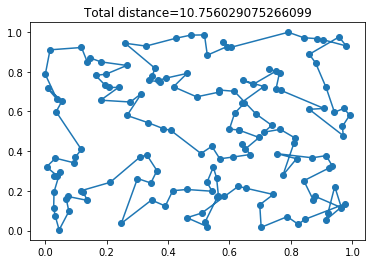

T=   0.02188 , distance=   10.75603 , accepted steps= 71


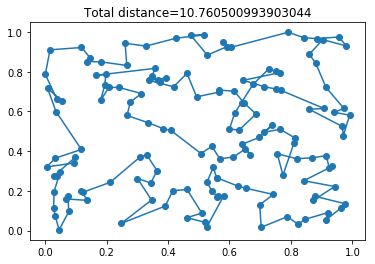

T=   0.01970 , distance=   10.76050 , accepted steps= 57


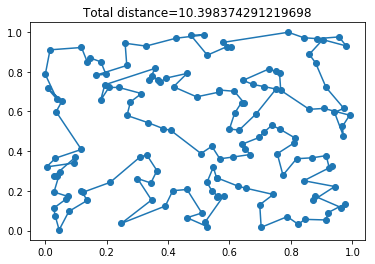

T=   0.01773 , distance=   10.39837 , accepted steps= 44


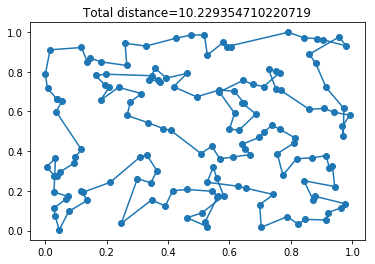

T=   0.01595 , distance=   10.22935 , accepted steps= 40


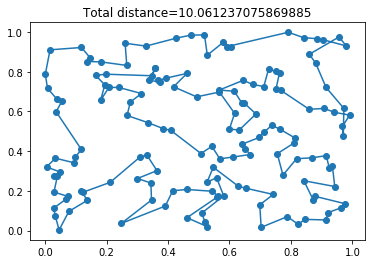

T=   0.01436 , distance=   10.06124 , accepted steps= 24


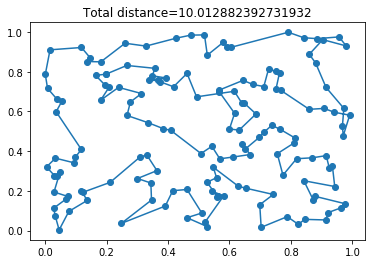

T=   0.01292 , distance=   10.01288 , accepted steps= 38


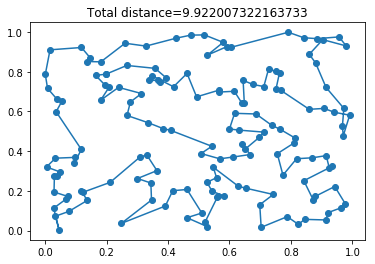

T=   0.01163 , distance=    9.92201 , accepted steps= 23


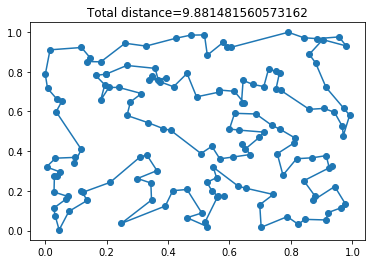

T=   0.01047 , distance=    9.88148 , accepted steps= 18


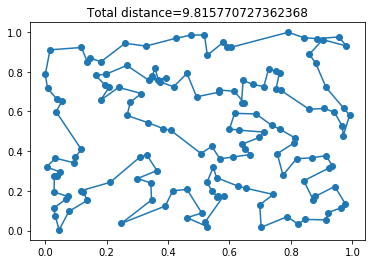

T=   0.00942 , distance=    9.81577 , accepted steps= 19


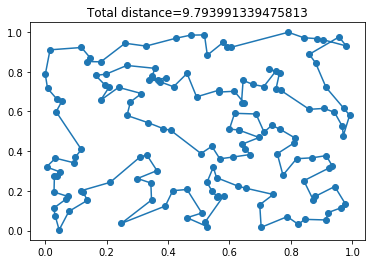

T=   0.00848 , distance=    9.79399 , accepted steps= 16


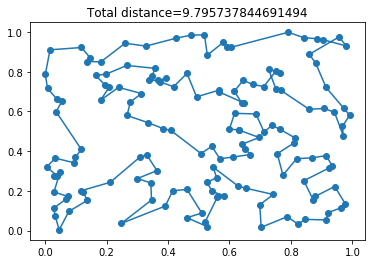

T=   0.00763 , distance=    9.79574 , accepted steps= 13


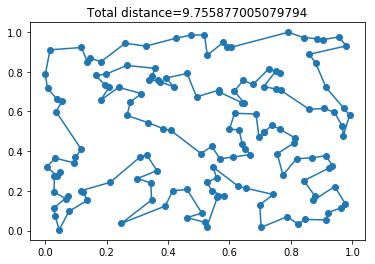

T=   0.00687 , distance=    9.75588 , accepted steps= 16


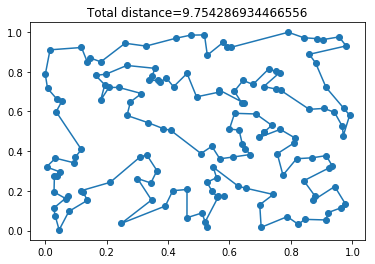

T=   0.00618 , distance=    9.75429 , accepted steps= 14


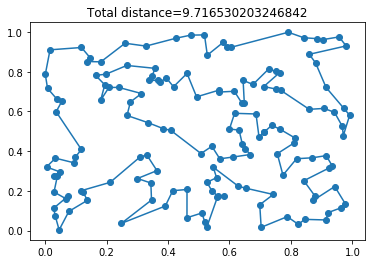

T=   0.00556 , distance=    9.71653 , accepted steps= 12


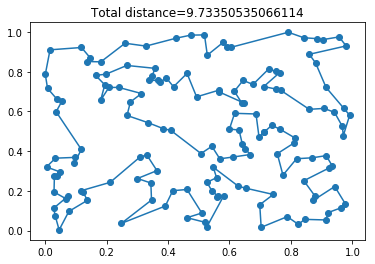

T=   0.00501 , distance=    9.73351 , accepted steps= 5


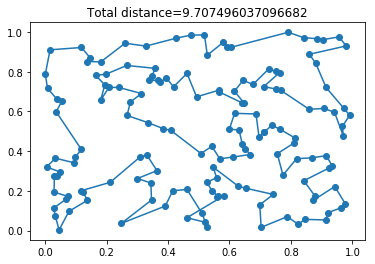

T=   0.00451 , distance=    9.70750 , accepted steps= 11


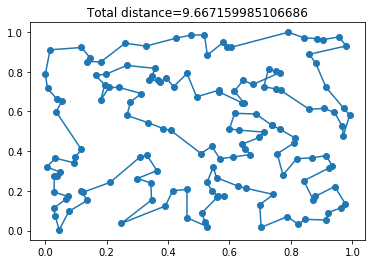

T=   0.00406 , distance=    9.66716 , accepted steps= 15


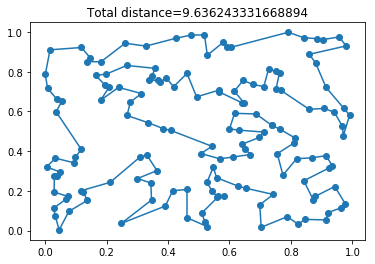

T=   0.00365 , distance=    9.63624 , accepted steps= 7


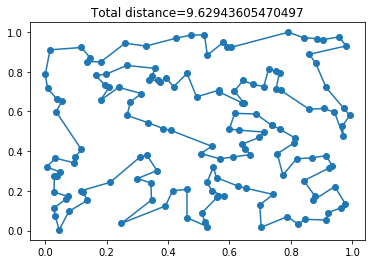

T=   0.00328 , distance=    9.62944 , accepted steps= 6


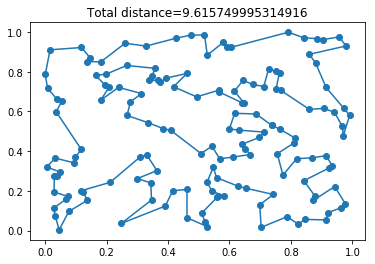

T=   0.00296 , distance=    9.61575 , accepted steps= 5


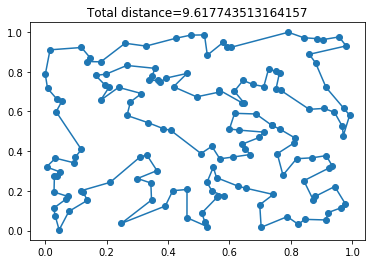

T=   0.00266 , distance=    9.61774 , accepted steps= 4


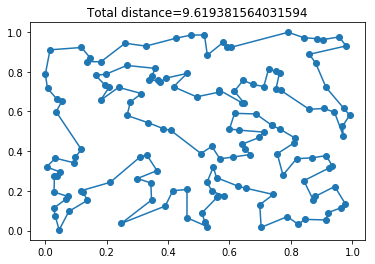

T=   0.00239 , distance=    9.61938 , accepted steps= 3


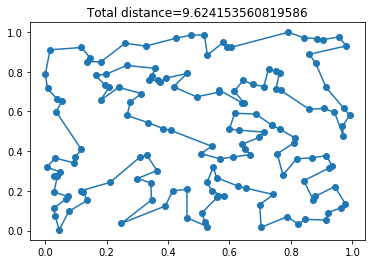

T=   0.00216 , distance=    9.62415 , accepted steps= 2


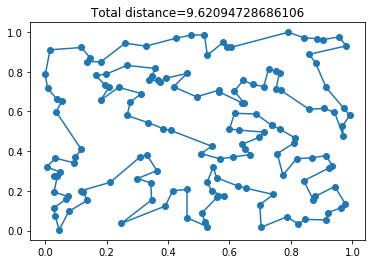

T=   0.00194 , distance=    9.62095 , accepted steps= 3


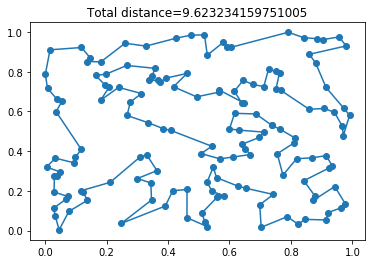

T=   0.00175 , distance=    9.62323 , accepted steps= 5


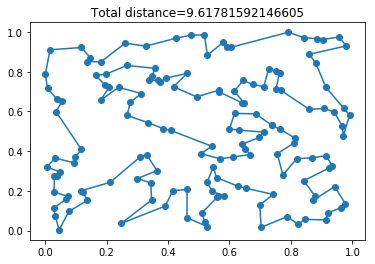

T=   0.00157 , distance=    9.61782 , accepted steps= 2


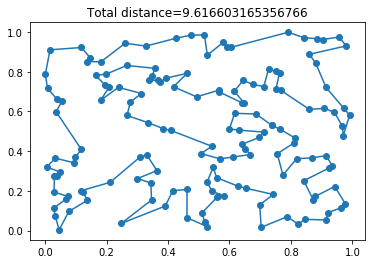

T=   0.00141 , distance=    9.61660 , accepted steps= 1


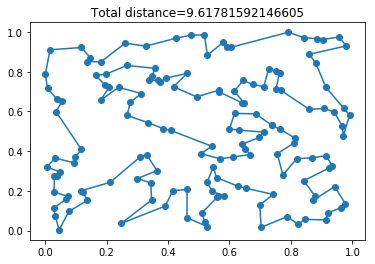

T=   0.00127 , distance=    9.61782 , accepted steps= 1


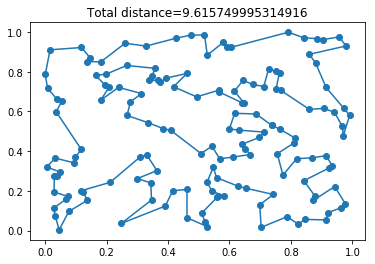

T=   0.00115 , distance=    9.61575 , accepted steps= 3


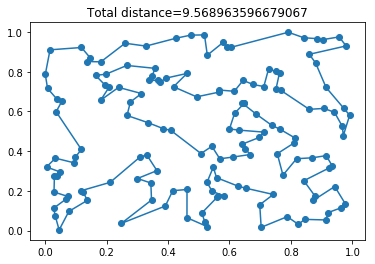

T=   0.00103 , distance=    9.56896 , accepted steps= 2


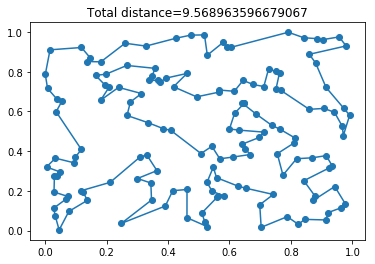

T=   0.00093 , distance=    9.56896 , accepted steps= 0


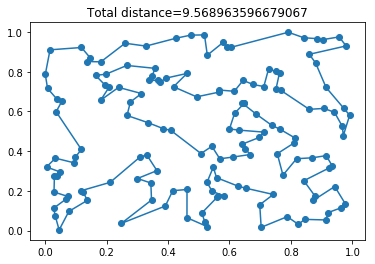

In [1]:
#!/usr/bin/env python

""" Traveling salesman problem solved using Simulated Annealing.
http://www.physics.rutgers.edu/~haule/681/src_MC/python_codes/salesman.py
"""
from scipy import *
from pylab import *

def Distance(R1, R2):
    return sqrt((R1[0]-R2[0])**2+(R1[1]-R2[1])**2)

def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]])
    return dist
    
def reverse(city, n):
    nct = len(city)
    nn = (1+ ((n[1]-n[0]) % nct))/2 # half the lenght of the segment to be reversed
    # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
    # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    for j in range(nn):
        k = (n[0]+j) % nct
        l = (n[1]-j) % nct
        (city[k],city[l]) = (city[l],city[k])  # swap
    
def transpt(city, n):
    nct = len(city)
    
    newcity=[]
    # Segment in the range n[0]...n[1]
    for j in range( (n[1]-n[0])%nct + 1):
        newcity.append(city[ (j+n[0])%nct ])
    # is followed by segment n[5]...n[2]
    for j in range( (n[2]-n[5])%nct + 1):
        newcity.append(city[ (j+n[5])%nct ])
    # is followed by segment n[3]...n[4]
    for j in range( (n[4]-n[3])%nct + 1):
        newcity.append(city[ (j+n[3])%nct ])
    return newcity

def Plot(city, R, dist):
    # Plot
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0], Pt[:,1], '-o')
    show()

if __name__=='__main__':

    ncity = 150        # Number of cities to visit
    maxTsteps = 100    # Temperature is lowered not more than maxTsteps
    Tstart = 0.2       # Starting temperature - has to be high enough
    fCool = 0.9        # Factor to multiply temperature at each cooling step
    maxSteps = 100*ncity     # Number of steps at constant temperature
    maxAccepted = 10*ncity   # Number of accepted steps at constant temperature

    Preverse = 0.5      # How often to choose reverse/transpose trial move

    # Choosing city coordinates
    R=[]  # coordinates of cities are choosen randomly
    for i in range(ncity):
        R.append( [rand(),rand()] )
    R = array(R)

    # The index table -- the order the cities are visited.
    city = range(ncity)
    # Distance of the travel at the beginning
    dist = TotalDistance(city, R)

    # Stores points of a move
    n = zeros(6, dtype=int)
    nct = len(R) # number of cities
    
    T = Tstart # temperature

    Plot(city, R, dist)
    
    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps
            
            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*rand())     # select one city
                n[1] = int((nct-1)*rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break
        
            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes
            
            if Preverse > rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])
                
                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct
        
                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])
                
                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    city = transpt(city, n)
                    
            if accepted > maxAccepted: break

        # Plot
        Plot(city, R, dist)
            
        print "T=%10.5f , distance= %10.5f , accepted steps= %d" %(T, dist, accepted)
        T *= fCool             # The system is cooled down
        if accepted == 0: break  # If the path does not want to change any more, we can stop

        
    Plot(city, R, dist)


<h2><b><i>Hill Climbing</i></b></h2>

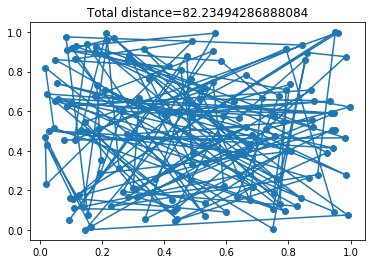

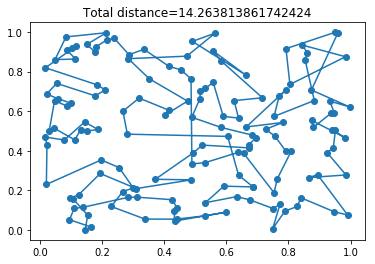

T=   0.20000 , distance=   14.26381 , accepted steps= 419


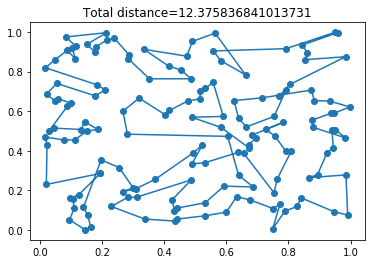

T=   0.18000 , distance=   12.37584 , accepted steps= 51


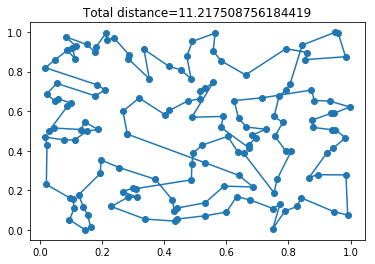

T=   0.16200 , distance=   11.21751 , accepted steps= 23


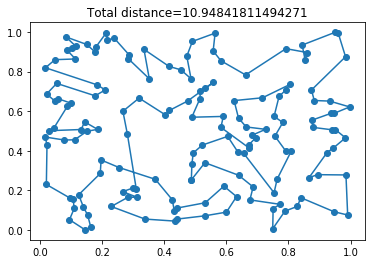

T=   0.14580 , distance=   10.94842 , accepted steps= 8


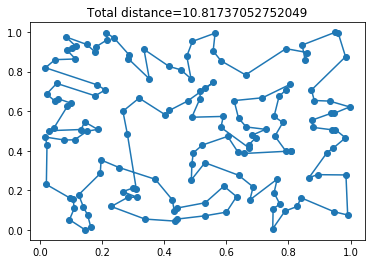

T=   0.13122 , distance=   10.81737 , accepted steps= 3


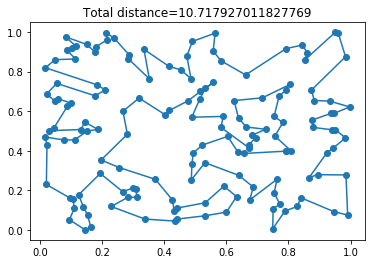

T=   0.11810 , distance=   10.71793 , accepted steps= 6


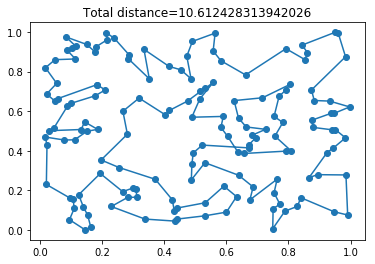

T=   0.10629 , distance=   10.61243 , accepted steps= 4


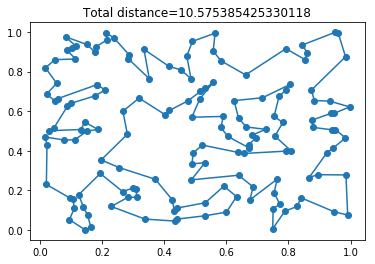

T=   0.09566 , distance=   10.57539 , accepted steps= 2


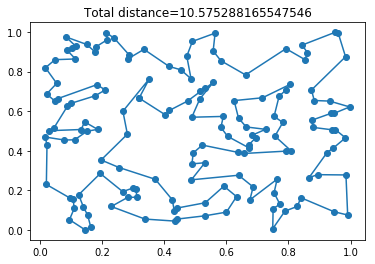

T=   0.08609 , distance=   10.57529 , accepted steps= 1


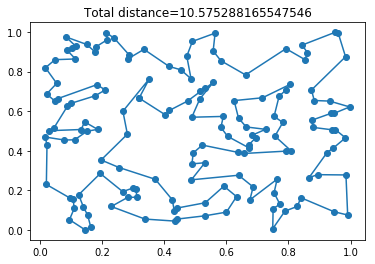

T=   0.07748 , distance=   10.57529 , accepted steps= 0


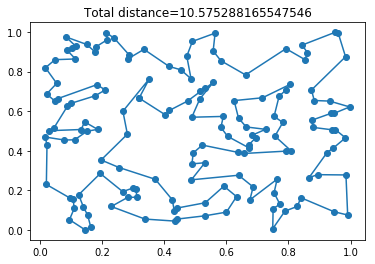

In [2]:
#!/usr/bin/env python

""" Traveling salesman problem solved using Simulated Annealing.
http://www.physics.rutgers.edu/~haule/681/src_MC/python_codes/salesman.py
"""
from scipy import *
from pylab import *

def Distance(R1, R2):
    return sqrt((R1[0]-R2[0])**2+(R1[1]-R2[1])**2)

def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]])
    return dist
    
def reverse(city, n):
    nct = len(city)
    nn = (1+ ((n[1]-n[0]) % nct))/2 # half the lenght of the segment to be reversed
    # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
    # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    for j in range(nn):
        k = (n[0]+j) % nct
        l = (n[1]-j) % nct
        (city[k],city[l]) = (city[l],city[k])  # swap
    
def transpt(city, n):
    nct = len(city)
    
    newcity=[]
    # Segment in the range n[0]...n[1]
    for j in range( (n[1]-n[0])%nct + 1):
        newcity.append(city[ (j+n[0])%nct ])
    # is followed by segment n[5]...n[2]
    for j in range( (n[2]-n[5])%nct + 1):
        newcity.append(city[ (j+n[5])%nct ])
    # is followed by segment n[3]...n[4]
    for j in range( (n[4]-n[3])%nct + 1):
        newcity.append(city[ (j+n[3])%nct ])
    return newcity

def Plot(city, R, dist):
    # Plot
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0], Pt[:,1], '-o')
    show()

if __name__=='__main__':

    ncity = 150       # Number of cities to visit
    maxTsteps = 100    # Temperature is lowered not more than maxTsteps
    Tstart = 0.2       # Starting temperature - has to be high enough
    fCool = 0.9        # Factor to multiply temperature at each cooling step
    maxSteps = 100*ncity     # Number of steps at constant temperature
    maxAccepted = 10*ncity   # Number of accepted steps at constant temperature

    Preverse = 0.5      # How often to choose reverse/transpose trial move

    # Choosing city coordinates
    R=[]  # coordinates of cities are choosen randomly
    for i in range(ncity):
        R.append( [rand(),rand()] )
    R = array(R)

    # The index table -- the order the cities are visited.
    city = range(ncity)
    # Distance of the travel at the beginning
    dist = TotalDistance(city, R)

    # Stores points of a move
    n = zeros(6, dtype=int)
    nct = len(R) # number of cities
    
    T = Tstart # temperature

    Plot(city, R, dist)
    
    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps
            
            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*rand())     # select one city
                n[1] = int((nct-1)*rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break
        
            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes
            
            if Preverse > rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])
                
                if de<0:
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct
        
                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])
                
                if de<0:
                    accepted += 1
                    dist += de
                    city = transpt(city, n)
                    
            if accepted > maxAccepted: break

        # Plot
        Plot(city, R, dist)
            
        print "T=%10.5f , distance= %10.5f , accepted steps= %d" %(T, dist, accepted)
        T *= fCool             # The system is cooled down
        if accepted == 0: break  # If the path does not want to change any more, we can stop

        
    Plot(city, R, dist)


<h3><b><i>Ερωτήσεις</i></b></h3>

<lu>
<li>Να διατυπώσετε το πρόβλημα <i>TSP</i>.</li>
<br>
<li>Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου <i>Hill Climbing</i> και να εξηγήσετε γιατί μπορεί να οδηγήσει σε κακές λύσεις.</li>
<br>
<li>Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου <i>Simulated Annealing</i> και γιατί είναι δυνατό να οδηγήσει σε καλύτερες λύσεις από τον αλγόριθμο <i>Hill Climbing</i>.</li>
<br>
<li>Να εκτελέσετε τα παραπάνω προγράμματα. Να καταγράψετε τις εξόδους τους. Δεν είναι απαραίτητο να κρατήσετε όλα τα διαγράμματα, αλλά μερικά από τα πιο αντιπροσωπευτικά.</li>
<br>
<li>Να σχολιάσετε τις διαφορές των δύο αλγορίθμων ως προς την τιμή της τελικής λύσης και το συνολικό αριθμό των βημάτων που απαιτούνται για να οδηγηθούμε σε αυτήν. Ποιος αλγόριθμος επιλέγει την καλύτερη λύση; Ποιος αλγόριθμος καθυστερεί πιο πολύ;</li>
<br>
<li>Μελετώντας τα διαγράμματα που επιστρέφουν ως έξοδο τα παραπάνω προγράμματα, να σχολιάσετε πόσο απότομες είναι οι μεταβολές ανάμεσα στις λύσεις που επιστρέφουν οι αλγόριθμοι σε κάθε βήμα μέχρι να φτάσουν στην τελική λύση. Σε ένα δεδομένο βήμα, επιλέγεται πάντα μια καλύτερη λύση ή κάποιος από τους δύο αλγορίθμους επιλέγει και χειρότερες λύσεις;</li>
</lu>

## Απαντήσεις:



1.    Στο TSP (Travelling salesman problem) έχουμε έναν πωλητή που επιθυμεί να επισκεφθεί έναν αριθμό πόλεων , στην περίπτωση μας 150, και να επιστρέψει πάλι στη πόλη απο την οποία άρχισε. Οι πόλεις μεταξύ τους έχουν μια απόσταση και ψάχνουμε την διαδρομή που θα ελαχιστοποιεί την συνολική απόσταση.

2.   Ο Hill Climbing λειτουργεί με το να αρχικοποιεί μια λύση. Στη συνέχεια σε κάθε βήμα παράγονται γειτονικές καταστάσεις, όπου σε αυτή την περίπτωση είναι το reverse/transpose της κατάστασης που βρίσκεται τώρα. Αν οι νέα κατάστασεις , δηλαδή οι διαδρομές είναι καλύτερες τότε τις θέτουμε σαν νέα κατάσταση, διαφορετικά τις απορρίπτουμε. Ο τερματισμός θα έρθει όταν φτάσουμε στο κριτήριο βημάτων που έχουμε θέσει ή όταν δεν πραγματοποιηθεί καμία νέα αλλαγή μετά από έναν κύκλο βημάτων. Το πρόβλημα με τον Hill climbing είναι ότι μπορεί να εγκλωβιστεί σε κάποια λύση και να μην έχει την δυνατότητα να εξετάσει άλλες. Αυτο προέρχεται από το γεγονός ότι μια κατάσταση πρέπει να είναι καλύτερη για να εξεταστεί, δηλαδή ακολουθείται ένα συγκεκριμένο μονοπάτι από προτεινόμενες λύσεις και δεν εξετάζονται μονοπάτια που ενώ στην αρχή μπορεί να προσφέρουν χειρότερες λύσεις μπορεί να καταλήξουν σε ολικά ελάχιστα.



3.   Ο Simulated Annealing αλγόριθμος λειτουργεί παρόμοια με τον Hill Climbing, παρόλα αυτά έχει κάποιες λεπτομέρειες στη λειτουργία του που τον κάνουν να ξεχωρίζει. Αρχικά έχουμε πάλι παραγωγή μια αρχικής κατάστασης και ορίζουμε εναν αριθμό βημάτων σε κάθε κύκλο. Τα βήματα ανήκουν στον ίδιο κύκλο όσο χαρακτηρίζονται από την ίδια θερμοκρασία. Στην αρχή έχω υψηλή θερμοκρασία , γεγονός που σημαίνει ότι όταν προταθεί μια νέα κατάσταση, ακόμα και αν δεν ειναι καλύτερη υπάρχει μεγάλη πιθανότητα να επιλεχθεί. Όσο προχωράμε στον αλγόριθμο η θερμοκρασία πέφτει και έτσι η πιθανότητα να επιλεχθεί μια κατάσταση που δεν είναι καλύτερη μειώνεται. Η ιδιότητα του αλγορίθμου να αποδέχεται καταστάσεις που δεν ειναι καλύτερες απο τις τωρινές είναι αυτή που μπορεί να οδηγήσει σε καλύτερες λύσεις από τον Hill Climbing καθώς μπορούμε να εξευρενήσουμε περισσότερα μονοπάτια και να μην κολλήσουμε σε τοπικά ελάχιστα.
4.    Simulated Annealing :

- T=   0.20000, distance=   42.71745 , accepted steps= 1501
- T=   0.09566 , distance=   24.39474 , accepted steps= 989
- T=   0.04575 , distance=   15.13776 , accepted steps= 253
- T=   0.01595 , distance=   10.22935 , accepted steps= 40
- T=   0.00093 , distance=    9.56896 , accepted steps= 0

Hill Climbing :

- T=   0.20000 , distance=   14.26381 , accepted steps= 419
- T=   0.16200 , distance=   11.21751 , accepted steps= 23
- T=   0.13122 , distance=   10.81737 , accepted steps= 3
- T=   0.09566 , distance=   10.57539 , accepted steps= 2
- T=   0.07748 , distance=   10.57529 , accepted steps= 0

5. O Αλγόριθμος Simulated Annealing φτάνει σε καλύτερη λύση, όπως φαίνεται και από τα παραπάνω αποτελέσματα παρόλα αυτά ήταν αυτός που καθυστερεί περισσότερο.
Παρατηρούμε ότι ο Hill Climbing εχει πολύ γρηγορότερη σύγκλιση μόλις σε 10 κύκλους έχει τερματίσει ενώ ο Simulated Annealing τερματίζει στους 53 κύκλους. Ο τερματισμός οφείλεται στο γεγονός ότι δεν γίνεται καμία νέα κατάσταση αποδεκτή. Ο αλγόριθμος Hill Climbing ακολουθεί ένα συγκεκριμένο μονοπάτι που τον οδηγεί σε μια αρκετά καλή τελική τιμή παρόλα αυτά δεν έχει τη δυνατότητα να δεχθεί μονοπάτια που θα τον οδηγήσουν στην καλύτερη τιμή του Simulated Annealing. Πολλές φορές καθοριστικό ρόλο στον Hill Climbing αλλά και στον Simulated Annealing έχει η αρχική κατάσταση.

6. Σε ένα δεδομένο βήμα ο αλγόριθμος Simulated Annealing, όπως αναφέραμε μπορεί να φέρει και χειρότερη λύση ενώ ο Hill Climbing επιλέγει πάντα καλύτερη.
Παρατηρούμε και στους δύο αλγορίθμους μια μεγάλη βελτίωση στον πρώτο κύκλο βημάτων. Ο αλγόριθμος Hill Climbing απο αρχική απόσταση = 82 καταλήγει σε απόσταση 14 και ο Simulated Annealing από αρχική απόσταση = 83 καταλήγει σε απόσταση 42. Ύστερα ο Hill Climbing σε 10 βήματα έχει φτάσει στην τελική του τιμή δηλαδή στο 10.57529 ενώ ο Simulated Annealing χρειάζεται περίπου 50 βήματα για να φτάσει στην τελική του τιμή δηλαδή το 9.56896. Παρόλο που ο πρώτος κύκλος έφερε τον Hill Climbing πιο κοντά στην τελική του λύση και αυτό μπορεί να μπερδέψει , δεν έχουμε παρόμοια σύγκλιση καθώς όταν ο  Simulated Annealing έφτασε στην τιμή 14 , δηλαδή όσο ήταν και ο Hill Climbing μετά τον πρώτο κύκλο, χρειάστηκε 37 κύκλους για να φτάσει στην τελική του τιμή ενώ o Hill Climbing 10.


